In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format

In [48]:
df = pd.read_excel("godigt_cc_data .xlsx")

In [49]:
df.head()

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
0,1,4384 39XX XXXX XXXX,438439,Visa,edge,2019-09-29,B,0,1,1,...,27,0,0,0,0,0,T,27729,Self Employed,290000
1,2,4377 48XX XXXX XXXX,437748,Visa,prosperity,2002-10-30,A,1,1,1,...,52,0,0,0,0,0,R,280854,0,950000
2,3,4377 48XX XXXX XXXX,437748,Visa,rewards,2013-10-05,C,0,0,0,...,23,1,0,0,0,0,R,70587,Student,210000
3,4,4258 06XX XXXX XXXX,425806,Visa,indianoil,1999-06-01,E,0,1,1,...,49,0,0,1,0,0,T,9156,Self Employed,80000
4,5,4377 48XX XXXX XXXX,437748,Visa,edge,2006-06-13,B,1,1,1,...,21,1,0,0,0,0,T,38108,Salaried,220000


In [50]:
df.shape

(8448, 28)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   userid                   8448 non-null   int64         
 1   card_no                  8448 non-null   object        
 2   card_bin_no              8448 non-null   int64         
 3   Issuer                   8448 non-null   object        
 4   card_type                8448 non-null   object        
 5   card_source_date         8448 non-null   datetime64[ns]
 6   high_networth            8448 non-null   object        
 7   active_30                8448 non-null   int64         
 8   active_60                8448 non-null   int64         
 9   active_90                8448 non-null   int64         
 10  cc_active30              8448 non-null   int64         
 11  cc_active60              8448 non-null   int64         
 12  cc_active90              8448 non-

In [52]:
dups = df.duplicated()
df[dups]

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit


In [53]:
df["active_30"].value_counts() # change to object

0    5978
1    2470
Name: active_30, dtype: int64

In [54]:
df["active_60"].value_counts()

0    4268
1    4180
Name: active_60, dtype: int64

In [55]:
df["active_90"].value_counts()

1    5424
0    3024
Name: active_90, dtype: int64

In [56]:
df["cc_active30"].value_counts()

0    6048
1    2400
Name: cc_active30, dtype: int64

In [57]:
df["cc_active60"].value_counts()

0    4355
1    4093
Name: cc_active60, dtype: int64

In [58]:
df["cc_active90"].value_counts()

1    5342
0    3106
Name: cc_active90, dtype: int64

In [59]:
df["widget_products"].value_counts()

7    1132
4    1117
5    1115
6    1062
3    1060
2    1010
1     997
0     955
Name: widget_products, dtype: int64

In [60]:
df["engagement_products"].value_counts()

4    1010
3     966
1     950
8     949
5     940
0     939
6     926
7     889
2     879
Name: engagement_products, dtype: int64

In [61]:
df.isnull().sum()

userid                      0
card_no                     0
card_bin_no                 0
Issuer                      0
card_type                   0
card_source_date            0
high_networth               0
active_30                   0
active_60                   0
active_90                   0
cc_active30                 0
cc_active60                 0
cc_active90                 0
hotlist_flag                0
widget_products             0
engagement_products         0
annual_income_at_source     0
other_bank_cc_holding       0
bank_vintage                0
T+1_month_activity          0
T+2_month_activity          0
T+3_month_activity          0
T+6_month_activity          0
T+12_month_activity         0
Transactor_revolver        38
avg_spends_l3m              0
Occupation_at_source        0
cc_limit                    0
dtype: int64

In [62]:
df["active_30"] = df["active_30"].astype("object")
df["active_60"] = df["active_60"].astype("object")
df["active_90"] = df["active_90"].astype("object")
df["cc_active30"] = df["cc_active30"].astype("object")
df["cc_active60"] = df["cc_active60"].astype("object")
df["cc_active90"] = df["cc_active90"].astype("object")
df["widget_products"] = df["widget_products"].astype("object")
df["engagement_products"] = df["engagement_products"].astype("object")
df["T+1_month_activity"] = df["T+1_month_activity"].astype("object")
df["T+2_month_activity"] = df["T+2_month_activity"].astype("object")
df["T+3_month_activity"] = df["T+3_month_activity"].astype("object")
df["T+6_month_activity"] = df["T+6_month_activity"].astype("object")
df["T+12_month_activity"] = df["T+12_month_activity"].astype("object")
df["card_bin_no"] = df["card_bin_no"].astype("object")

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   userid                   8448 non-null   int64         
 1   card_no                  8448 non-null   object        
 2   card_bin_no              8448 non-null   object        
 3   Issuer                   8448 non-null   object        
 4   card_type                8448 non-null   object        
 5   card_source_date         8448 non-null   datetime64[ns]
 6   high_networth            8448 non-null   object        
 7   active_30                8448 non-null   object        
 8   active_60                8448 non-null   object        
 9   active_90                8448 non-null   object        
 10  cc_active30              8448 non-null   object        
 11  cc_active60              8448 non-null   object        
 12  cc_active90              8448 non-

In [64]:
df["Transactor_revolver"].value_counts()

T    7115
R    1295
Name: Transactor_revolver, dtype: int64

In [65]:
df["Transactor_revolver"].unique()

array(['T', 'R', nan], dtype=object)

In [66]:
df["Transactor_revolver"].replace(np.nan,df["Transactor_revolver"].mode()[0],inplace=True)

In [67]:
df["Transactor_revolver"].value_counts()

T    7153
R    1295
Name: Transactor_revolver, dtype: int64

In [68]:
df["Transactor_revolver"].unique()

array(['T', 'R'], dtype=object)

In [69]:
df["Occupation_at_source"].value_counts()

Salaried         3918
Self Employed    2175
Retired          1089
Student           621
Housewife         384
0                 261
Name: Occupation_at_source, dtype: int64

In [70]:
df["Occupation_at_source"] = np.where(df["Occupation_at_source"] == 0, "Not specified", df["Occupation_at_source"])

In [71]:
df["Occupation_at_source"].value_counts()

Salaried         3918
Self Employed    2175
Retired          1089
Student           621
Housewife         384
Not specified     261
Name: Occupation_at_source, dtype: int64

In [72]:
df.isnull().sum()

userid                     0
card_no                    0
card_bin_no                0
Issuer                     0
card_type                  0
card_source_date           0
high_networth              0
active_30                  0
active_60                  0
active_90                  0
cc_active30                0
cc_active60                0
cc_active90                0
hotlist_flag               0
widget_products            0
engagement_products        0
annual_income_at_source    0
other_bank_cc_holding      0
bank_vintage               0
T+1_month_activity         0
T+2_month_activity         0
T+3_month_activity         0
T+6_month_activity         0
T+12_month_activity        0
Transactor_revolver        0
avg_spends_l3m             0
Occupation_at_source       0
cc_limit                   0
dtype: int64

In [73]:
df.drop("userid",axis=1,inplace=True)

In [74]:
num = df.dtypes[df.dtypes == "int64"].index

In [75]:
num

Index(['annual_income_at_source', 'bank_vintage', 'avg_spends_l3m',
       'cc_limit'],
      dtype='object')

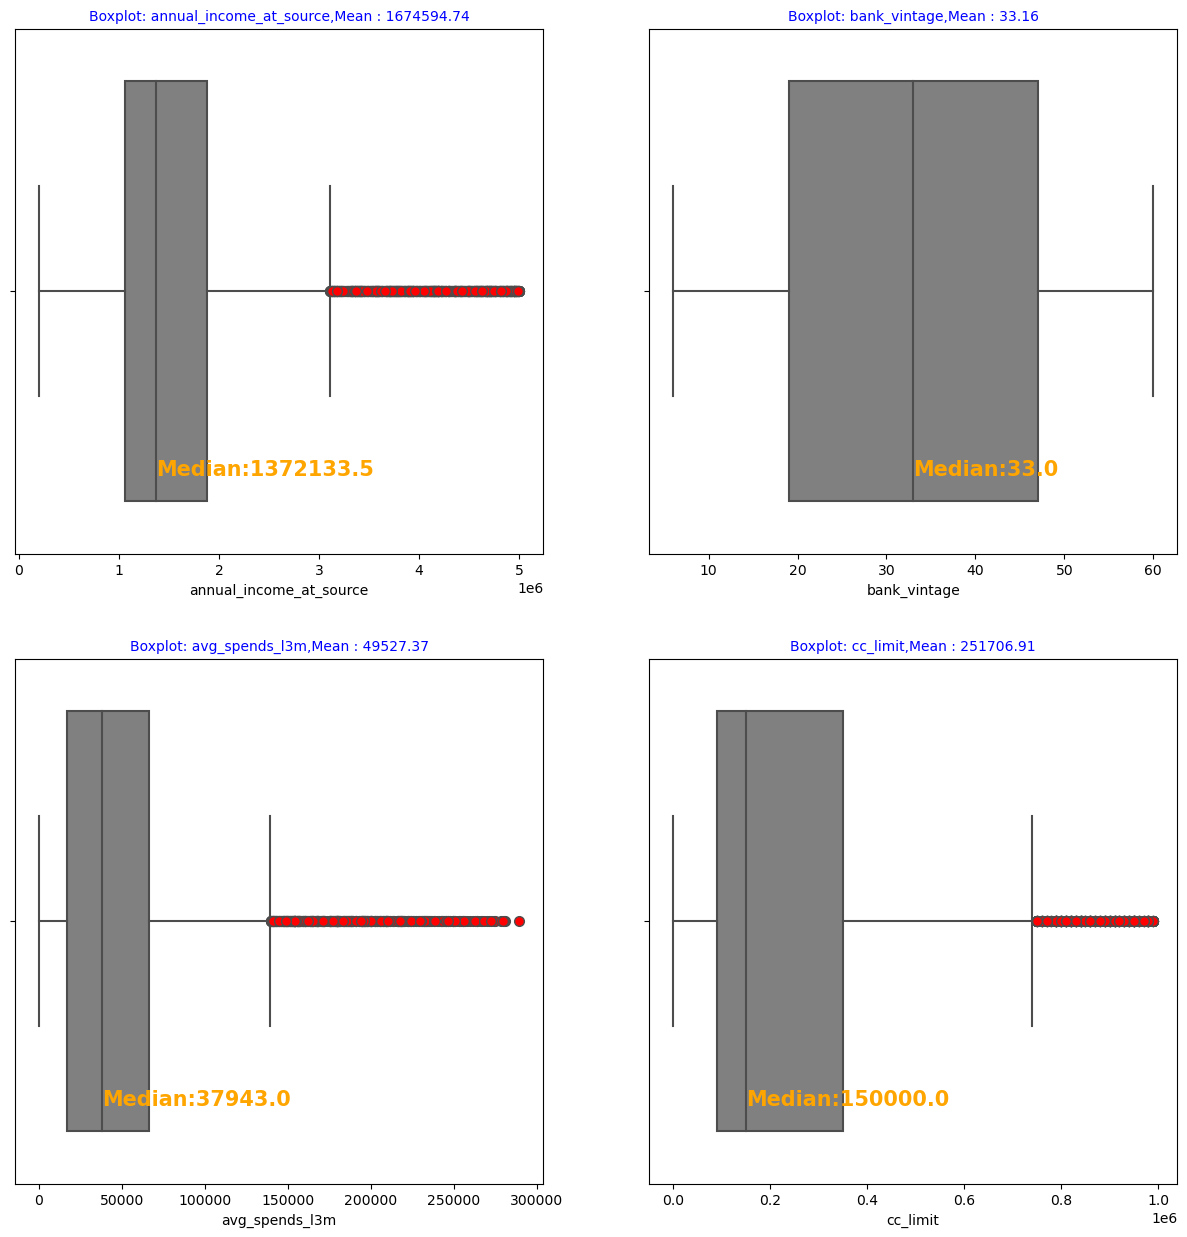

In [76]:
fig,axes = plt.subplots(2,2,figsize=(15,15))
for i,j in zip(num,axes.flatten()):
    sns.boxplot(df,x=i,ax=j,color="Grey",flierprops={"marker":"o", "markersize":"7","markerfacecolor":"red"})
    j.set_title(f"Boxplot: {i},Mean : {round(df[i].mean(),2)}",fontsize=10,color="Blue")
    for p in j.patches:
        j.annotate(text = f"Median:{round(df[i].median(),2)}",xy = (df[i].median(),0.35),fontsize=15,color="Orange",weight='bold')

In [77]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
annual_income_at_source,8448.00,1674594.74,1064307.09,200095.00,1061104.00,1372133.50,1881734.25,4999508.00
bank_vintage,8448.00,33.16,15.87,6.00,19.00,33.00,47.00,60.00
avg_spends_l3m,8448.00,49527.37,46244.95,0.00,17110.00,37943.00,66095.75,289292.00
cc_limit,8448.00,251706.91,229114.86,0.00,90000.00,150000.00,350000.00,990000.00


<font color = "blue">
<font size = 5>
Analyse the dataset and list down the top 5 important variables, along with the business justifications.

### The bank will make a profit only through the customers that show higher intent towards a recommended credit card. (Higher intent means consumers would want to use the card and hence not be attrite.)
### To reduce the attrition rate, we have to find the customers who will likely to have low intent or attrite due to the Non payment of credit.

#### The Variables card_no, card_bin_no, card_source_date, card_type and Issuer wont have any valuable information.
#### active_30,60 & 90 are related to the account activity and widget product and engagement products are also not related to credit card.
#### As we are focusing on the credit card attrition, annual_income_at_source, other_bank_cc_holding, bank_vintage, T+1_month_activity, T+2_month_activity, T+3_month_activity, T+6_month_activity, T+12_month_activity, Transactor_revolver, avg_spends_l3m, Occupation_at_source, cc_limit,cc_active30, cc_active60, cc_active90 can be useful as they are related to credit card.

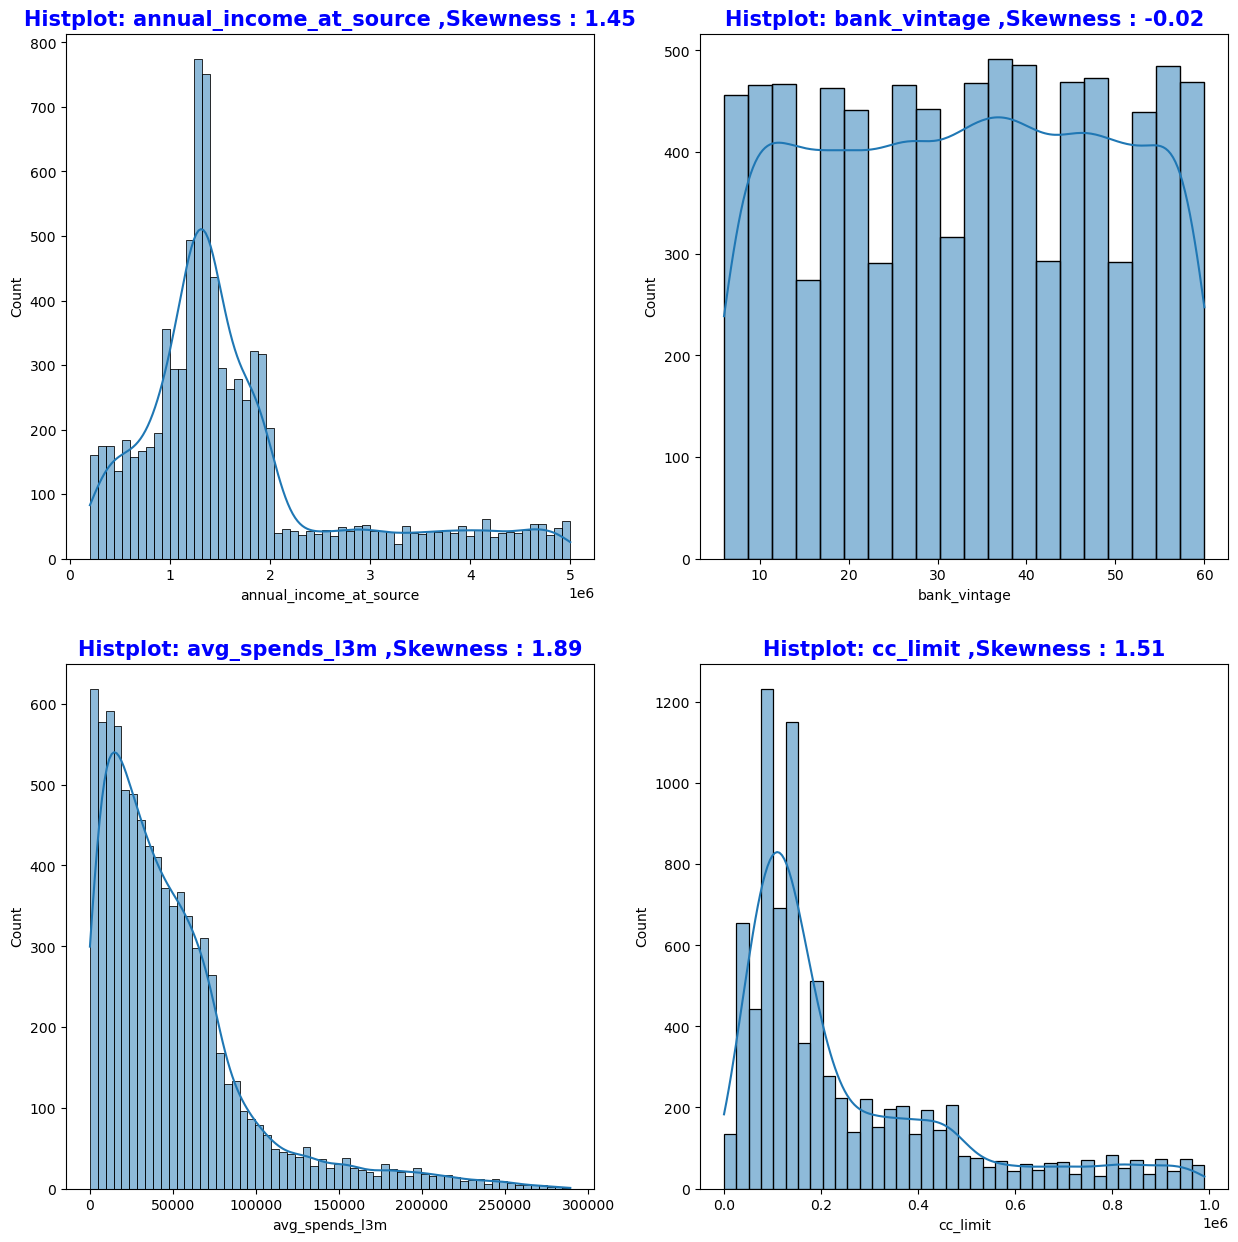

In [78]:
fig,axes = plt.subplots(2,2,figsize=(15,15))
for i,j in zip(num,axes.flatten()):
    sns.histplot(df,x=i,ax=j,kde=True)
    j.set_title(f"Histplot: {i} ,Skewness : {round(df[i].skew(),2)}",fontsize=15,weight='bold',color="Blue")

#### The Average spending limit of the customers are less than 80000 dollars and 505 of the customers annual income is less than 1372133 dollars. Most of the customers have the credit limit of 100000 dollars.

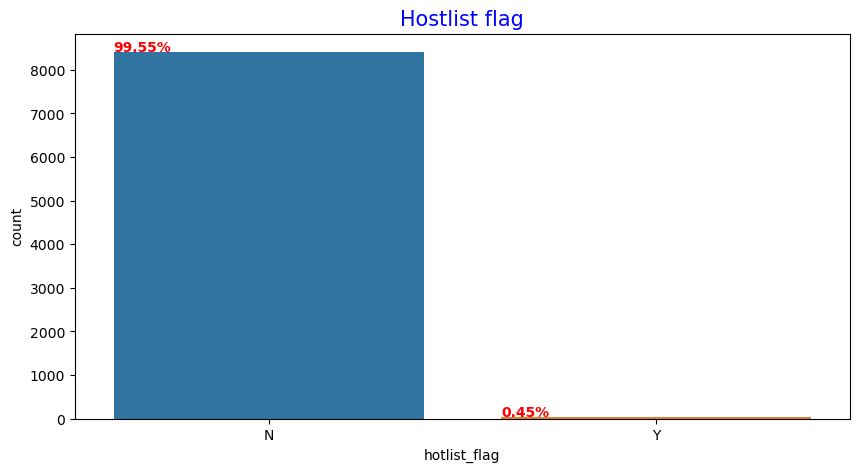

In [79]:
fig,axes = plt.subplots(figsize=(10,5))
sns.countplot(df,x="hotlist_flag")
axes.set_title("Hostlist flag",fontsize=15,color="Blue")
for p in axes.patches:
        axes.annotate(text = f"{round(p.get_height()/len(df)*100,2)}%",xy = (p.get_x(),p.get_height()+8),fontsize=10,weight='bold',color="Red")

In [80]:
df[df["hotlist_flag"]=="Y"]["cc_limit"].sum()/df["cc_limit"].sum()*100

0.49802014653737264

#### The hotlisted credit card is only 0.45% and 0.5% of the credit limit is unused.

In [81]:
df["Payback_capacity"] = df["annual_income_at_source"] > df["cc_limit"]

In [82]:
df["Payback_capacity"].value_counts(normalize=True)

True   1.00
Name: Payback_capacity, dtype: float64

#### This is actually good for banks as the customers have payback capacity if they fullly utilise the credit limit.

In [83]:
for i in range(len(df)):
    if ((df.loc[i,"cc_limit"] - df.loc[i,"avg_spends_l3m"])<0):
        df.loc[i,"Full_utilisation"] = "Over Utilize"
    elif ((df.loc[i,"cc_limit"] - df.loc[i,"avg_spends_l3m"])==0):
        df.loc[i,"Full_utilisation"] = "Full Utilize"
    else:
        df.loc[i,"Full_utilisation"] = "Under Utilize"

In [84]:
df["Full_utilisation"].value_counts(normalize=True)

Under Utilize   0.99
Over Utilize    0.01
Full Utilize    0.00
Name: Full_utilisation, dtype: float64

#### 0.01% of the customers is over utilizing the credit limit. This is good as the bank can charge interest. Still more customers have to fully utilize the credit limit.

In [85]:
df["Unused_limit"] = df["cc_limit"] - df["avg_spends_l3m"]

In [86]:
df["Unused_limit"].sum()

1708012816

In [87]:
df["Unused_limit"].sum()/df["cc_limit"].sum()*100

80.32339876411999

#### 99% of the customers is not fully utilizing the credit card limit. 80% of the overall credit limit is not utilised. If it is utilised the bank can charges interest on those unused limit and it will generate profit.

In [88]:
df["Occupation_at_source"].value_counts(normalize=True)

Salaried        0.46
Self Employed   0.26
Retired         0.13
Student         0.07
Housewife       0.05
Not specified   0.03
Name: Occupation_at_source, dtype: float64

In [89]:
pd.pivot_table(df,index="Occupation_at_source",values=["avg_spends_l3m","Unused_limit"],aggfunc=np.sum).sort_values(by="Unused_limit",ascending=False)

,Unused_limit,avg_spends_l3m
Occupation_at_source,,
Salaried,735095769,191554231
Self Employed,572065837,127884163
Not specified,169343952,26636048
Student,132136855,30683145
Retired,73381977,31118023
Housewife,25988426,10531574


#### 70% of the people who has credit card is salaried and self employed. Unused limit is also high in these set of customers.

In [90]:
df[(df["cc_active30"]==0) & (df["cc_active60"]==0) & (df["cc_active90"]==0)].shape[0]/len(df)*100

36.766098484848484

In [91]:
df[(df["cc_active30"]==0) & (df["cc_active60"]==0) & (df["cc_active90"]==0)]["Occupation_at_source"].value_counts(normalize=True)

Salaried        0.40
Self Employed   0.21
Student         0.14
Retired         0.13
Housewife       0.09
Not specified   0.03
Name: Occupation_at_source, dtype: float64

#### 36% of the customers have not used the credit card for the past 90 days.These 36% has low intent on using the credit card. The probability of attrition for these customers is high. Most of them belong to the salaried profession. 

### The Top 5 Variables important to business to find a pattern on the attrition rate to focus on that segment to improve the credit card services are:
#### annual_income_at_source
#### avg_spends_l3m
#### cc_limit
#### cc_active
#### Occupation_at_source
### These are the top 5 variables but to find the pattern, these has been be analyzed in relationship with other variables to gives us inference about the data.